In [130]:
#Diabetes prediction using Machine Learning model(Support vector machine)

In [131]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [132]:
#Loading the diabetes dataset
data = pd.read_csv(r"C:\Users\mdosa\Downloads\diab\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
#EXPLORATORY DATA ANALYSIS (EDA)
data.columns #No.of columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [134]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [135]:
#To know more about the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [136]:
#Checking if there are any null values or not
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [137]:
#checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [138]:
data_copy = data.copy(deep=True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
#Showing the count of NANs
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


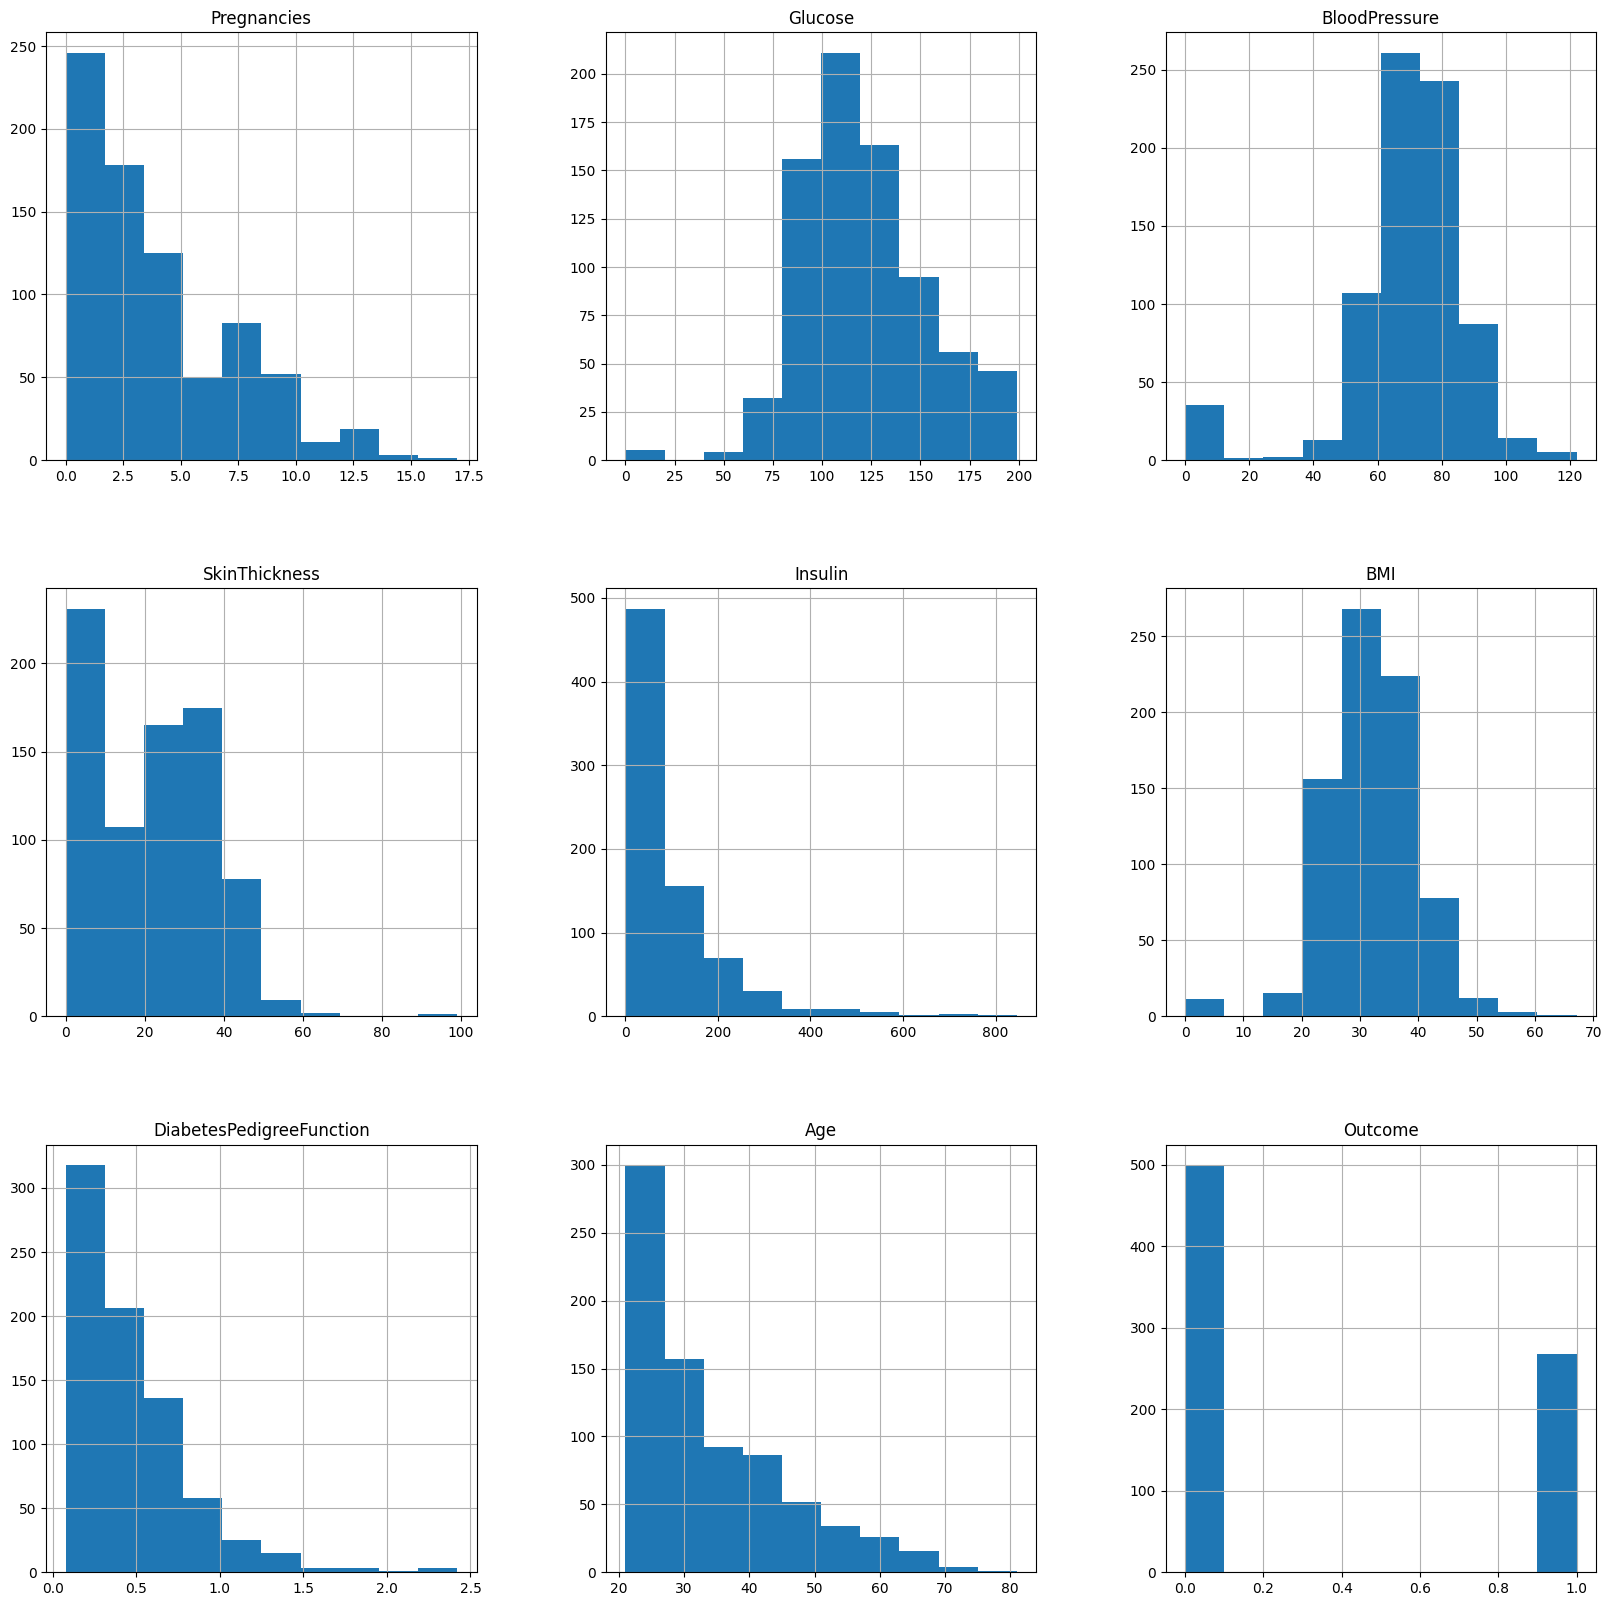

In [139]:
#DATA VISUALIZATION(HISTOGRAM)
p = data.hist(figsize = (20,20))

In [140]:
#Aiming to impute NAN values for the columns in accordance with their distribution
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(),inplace = True)

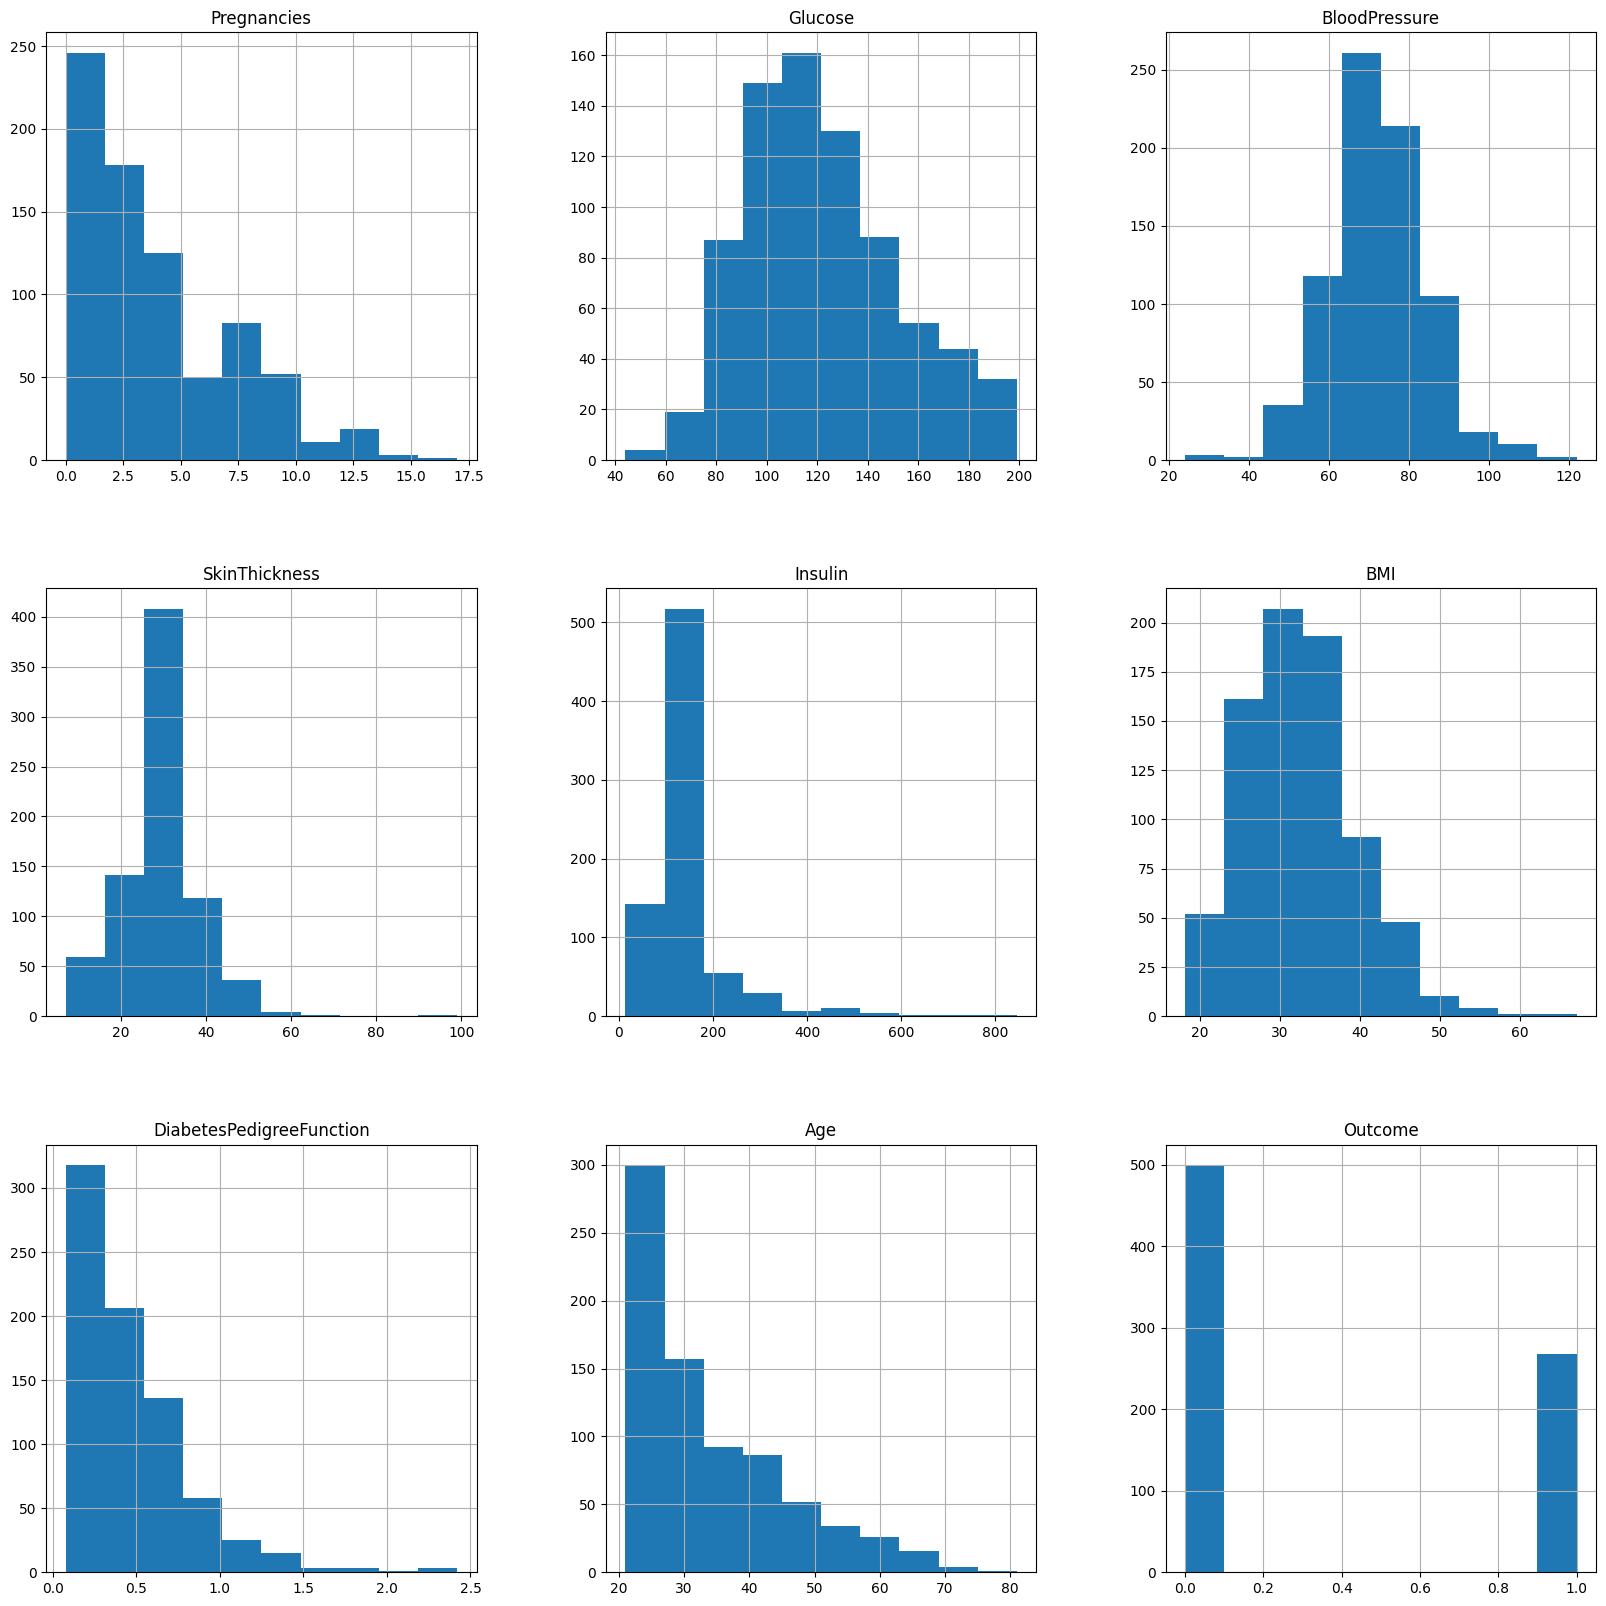

In [141]:
#Plotting the distribution after removing the NAN values
p = data_copy.hist(figsize = (20,20))

Outcome
0    500
1    268
Name: count, dtype: int64


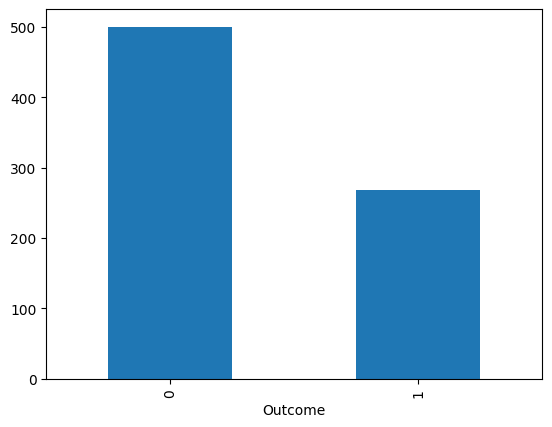

In [142]:
#Checking the balance of the data by plotting the count of outcomes by their values
color_wheel = {1:"#0392cf",2:"#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x+1))
print(data.Outcome.value_counts())
p = data.Outcome.value_counts().plot(kind="bar")

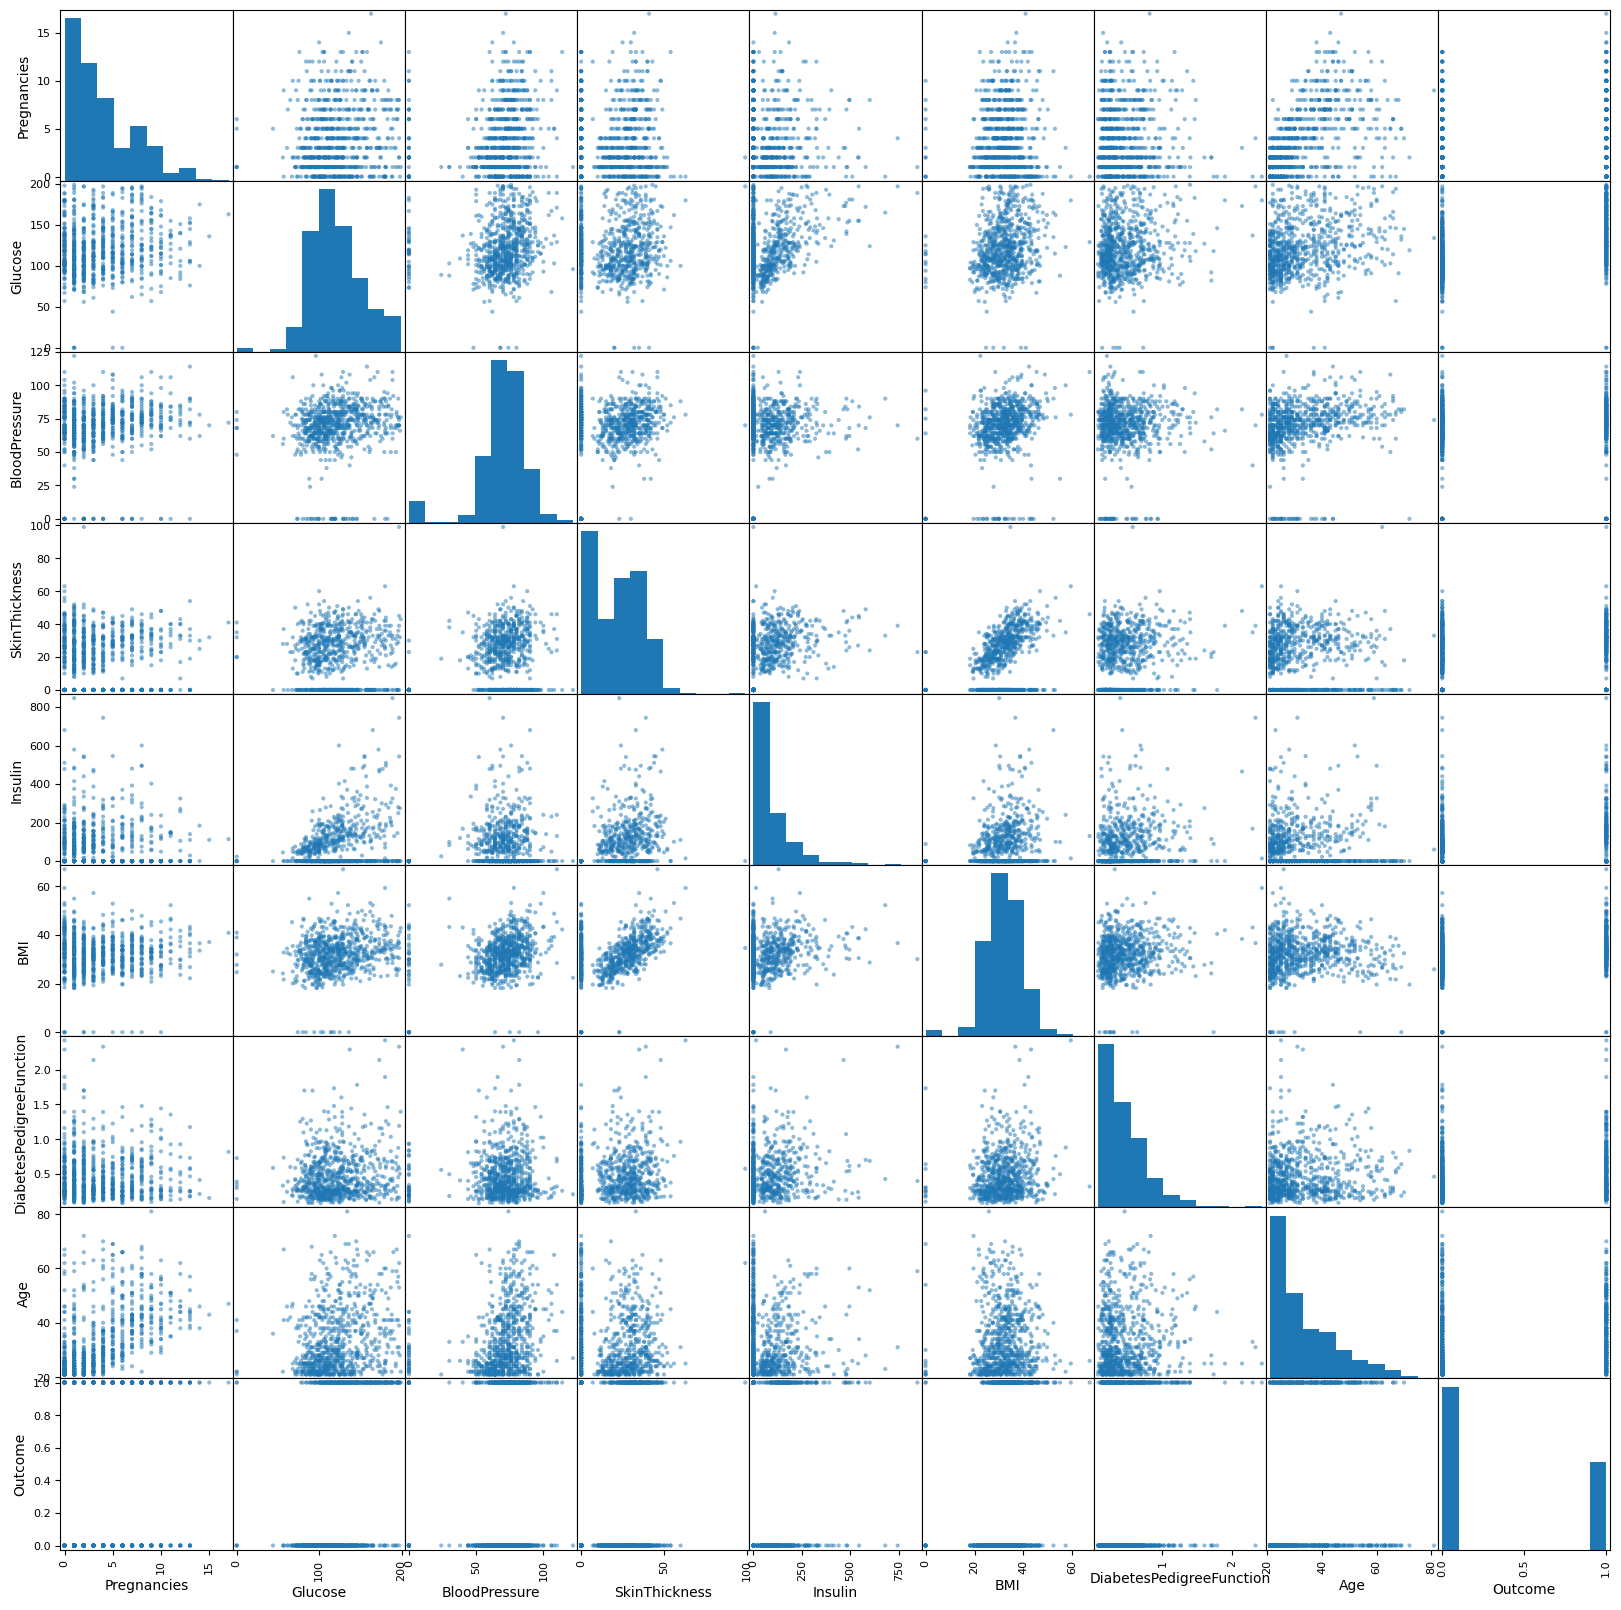

In [143]:
#Plotting a scatter matrix of uncleaned data
p = scatter_matrix(data,figsize = (20,20))

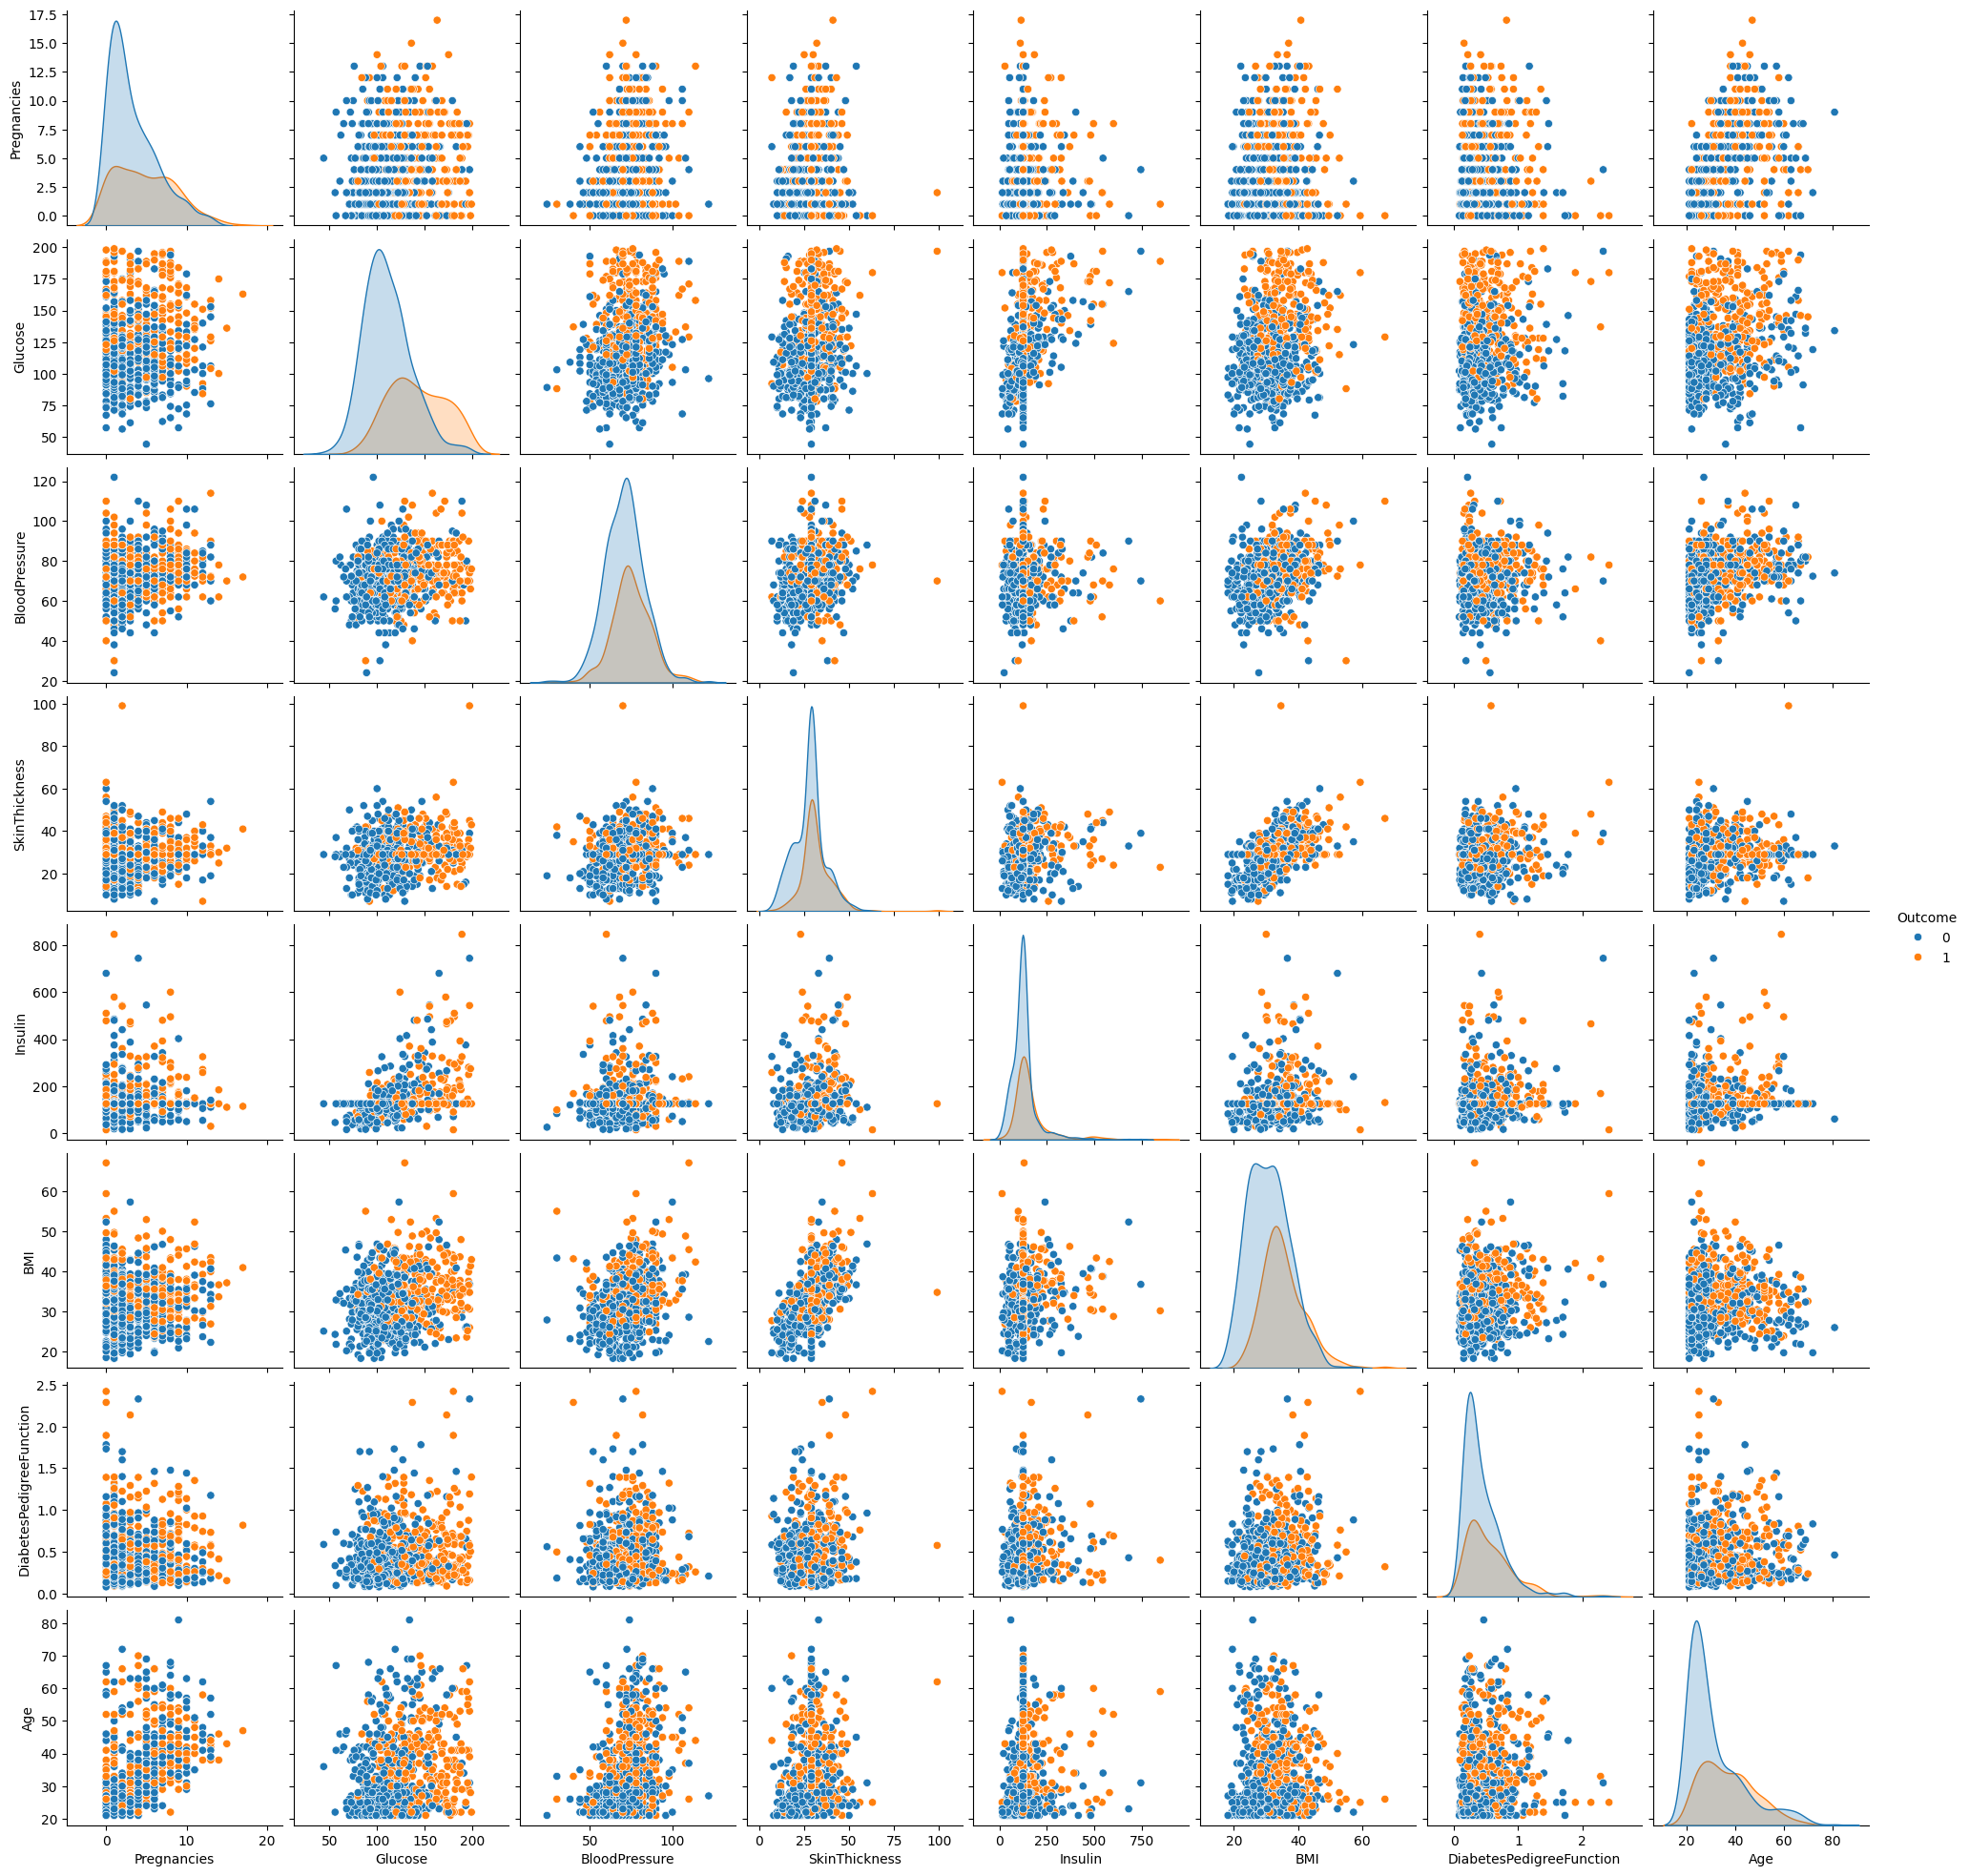

In [144]:
#Plotting the pair plots for the data
p = sns.pairplot(data_copy, hue = 'Outcome')

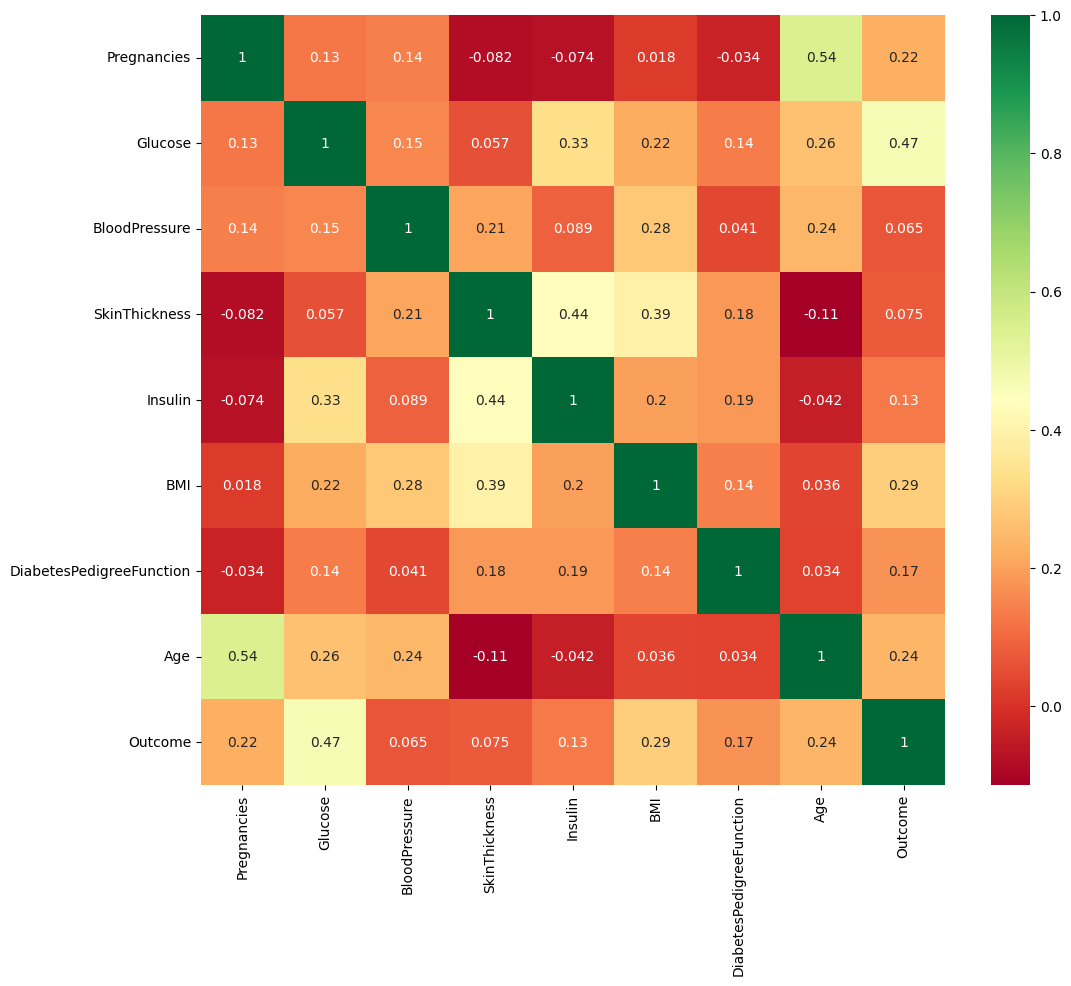

In [145]:
#Correlation between all the features before cleaning
plt.figure(figsize = (12,10))
p = sns.heatmap(data.corr(),annot = True,cmap = 'RdYlGn')

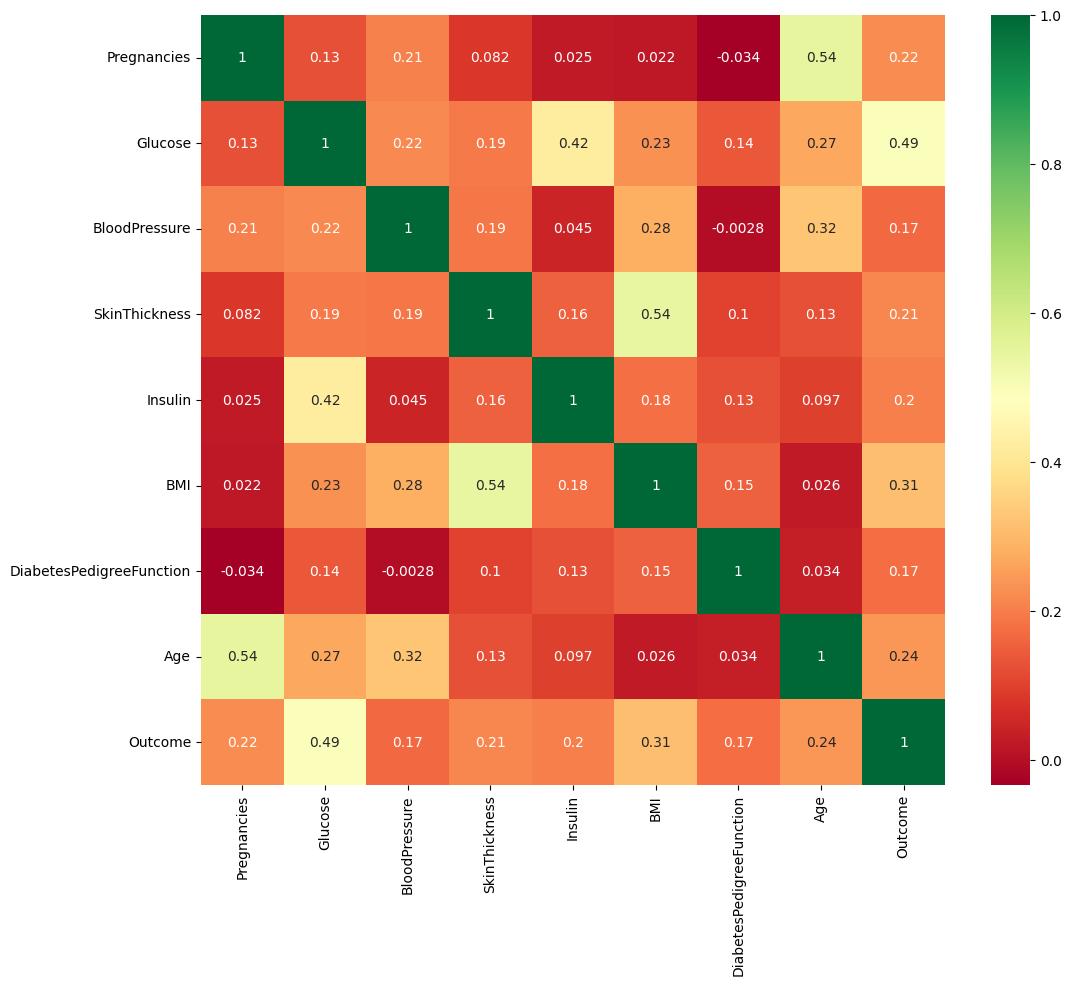

In [146]:
#Correlation between all the features after cleaning
plt.figure(figsize = (12,10))
p = sns.heatmap(data_copy.corr(),annot = True,cmap = 'RdYlGn')

In [147]:
#Scaling the data
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [148]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),),columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [149]:
y = data_copy.Outcome

In [150]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
#Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state = 42,stratify = y)

In [153]:
#Model Building (K-NEAREST NEIGHBOR)
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [154]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [155]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [156]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x:x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [157]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x:x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


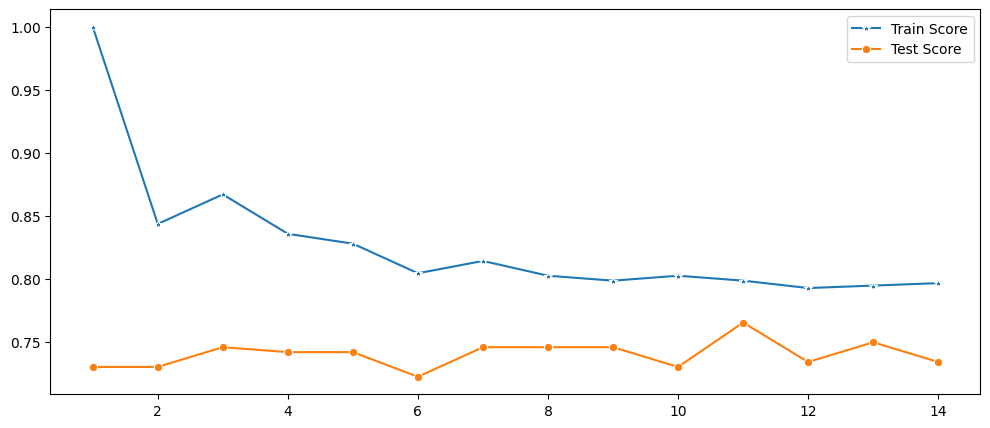

In [158]:
plt.figure(figsize = (12,5))
p = sns.lineplot(x=list(range(1,15)),y = train_scores,marker = '*',label = "Train Score")
p = sns.lineplot(x=list(range(1,15)),y = test_scores,marker = 'o',label = "Test Score")

In [159]:
#Best result is captured at k = 11
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

Text(50.722222222222214, 0.5, 'Actual label')

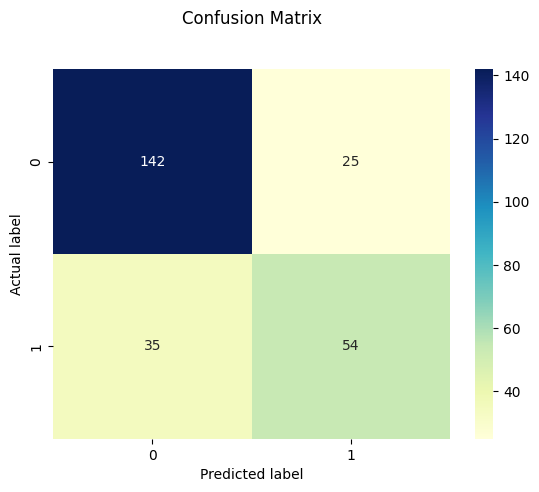

In [161]:
#Confusion Matrix
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
p= sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = "g")
plt.title('Confusion Matrix',y = 1.1)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [162]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



In [165]:
#ROC-AUC Curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

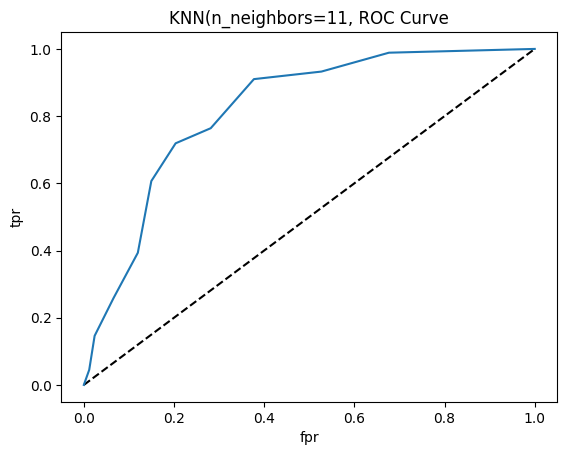

In [167]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = "knn")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN(n_neighbors=11, ROC Curve')
plt.show()

In [168]:
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

In [171]:
#Implementing GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)
print("Best Score:" +str(knn_cv.best_score_))
print("Best Params : " +str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Params : {'n_neighbors': np.int64(25)}
